In [10]:
from ipywidgets import FileUpload
from IPython.display import display

upload = FileUpload(
    accept='image/*',
    multiple=False
)

display(upload)


FileUpload(value=(), accept='image/*', description='Upload')

In [12]:
import cv2
import numpy as np

uploaded_file = upload.value[0]
content = uploaded_file['content']

img_np = np.frombuffer(content, np.uint8)
img = cv2.imdecode(img_np, cv2.IMREAD_COLOR)

print("Image loaded ✅", img.shape)


Image loaded ✅ (1274, 900, 3)


In [36]:
from paddleocr import PaddleOCR

ocr_id = PaddleOCR(use_angle_cls=True, lang='id')
ocr_en = PaddleOCR(use_angle_cls=True, lang='en')

res_id = ocr_id.ocr(img, cls=True)
res_en = ocr_en.ocr(img, cls=True)

print("ID OCR done")
print("EN OCR done")


[2025/12/07 01:28:28] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\62813/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\62813/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_te

In [30]:
for line in result[0]:
    text = line[1][0]
    conf = line[1][1]
    print(f"{text} ")


CONTACT 
Richard Lauren 
info@resumekraft.com 
PROGRAMMERANALYST 
202-555-0120 
Chicago.llinois,US 
in linkedin.com/resumekraft 
SUMMARY 
SKILLS 
Highly skilled and motivated Programmer Analyst with 5+years of experience 
in designing, developing, and implementing efficient software solutions. 
Proficient in programming languages such as Java and C++,with expertise in 
C#with ASP.Net Framework 
database management and system analysis.Strong problem-solving abilities 
Python with Django 
and ability to work collaboratively with cross-functional teams.Demonstrated 
Framework 
success in delivering high-quality projects on time and within budget.Seeking 
Angular 12 
an opportunity to utilize my technical expertise and passion for coding to drive 
SQL/MongoDB 
business success. 
HTML5.CSS3 
EXPERIENCE 
UI&UX designing 
Experienced in all project 
Programmer Analyst 
Sep 2021-Present 
phases using Waterfall and 
Cognizant 
Agile Methodologies 
Designed.Developed,and Deployed various feature

(-0.5, 899.5, 1273.5, -0.5)

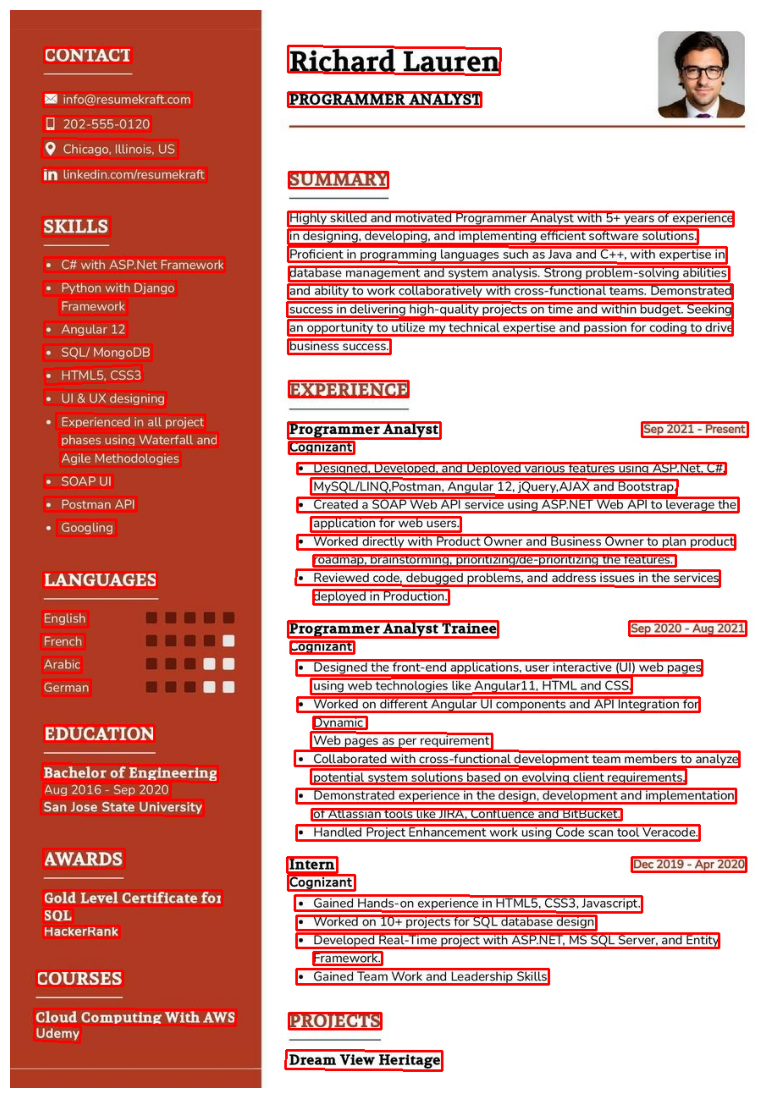

In [31]:
import cv2
import matplotlib.pyplot as plt

img_copy = img_rgb.copy()

for box in boxes:
    box = np.array(box).astype(int)
    cv2.polylines(img_copy, [box], isClosed=True, color=(255,0,0), thickness=2)

plt.figure(figsize=(10,14))
plt.imshow(img_copy)
plt.axis('off')
